In [ ]:
# Importing necessary libraries
import streamlit as st
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from collections import Counter
import re 
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud


# Loading the dataset as a pandas DataFrame
df = pd.read_csv("D:\metadata.csv")

#View the first few rows of the dataset
print(df.head())

<>:14: SyntaxWarning: invalid escape sequence '\m'
<>:14: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_17856\1420245934.py:14: SyntaxWarning: invalid escape sequence '\m'
  df = pd.read_csv("D:\metadata.csv")
C:\Users\Administrator\AppData\Local\Temp\ipykernel_17856\1420245934.py:14: DtypeWarning: Columns (1,4,5,6,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("D:\metadata.csv")


   cord_uid                                       sha source_x  \
0  ug7v899j  d1aafb70c066a2068b02786f8929fd9c900897fb      PMC   
1  02tnwd4m  6b0567729c2143a66d737eb0a2f63f2dce2e5a7d      PMC   
2  ejv2xln0  06ced00a5fc04215949aa72528f2eeaae1d58927      PMC   
3  2b73a28n  348055649b6b8cf2b9a376498df9bf41f7123605      PMC   
4  9785vg6d  5f48792a5fa08bed9f56016f4981ae2ca6031b32      PMC   

                                               title                    doi  \
0  Clinical features of culture-proven Mycoplasma...  10.1186/1471-2334-1-6   
1  Nitric oxide: a pro-inflammatory mediator in l...           10.1186/rr14   
2    Surfactant protein-D and pulmonary host defense           10.1186/rr19   
3               Role of endothelin-1 in lung disease           10.1186/rr44   
4  Gene expression in epithelial cells in respons...           10.1186/rr61   

      pmcid pubmed_id license  \
0  PMC35282  11472636   no-cc   
1  PMC59543  11667967   no-cc   
2  PMC59549  11667972   no-cc

In [33]:
# Cheking the shape of the dataset
print(df.shape)

# The dataset has 1056660 rows and 19 columns

(1056660, 19)


In [34]:
# Checking data types of each column
print(df.dtypes)

cord_uid             object
sha                  object
source_x             object
title                object
doi                  object
pmcid                object
pubmed_id            object
license              object
abstract             object
publish_time         object
authors              object
journal              object
mag_id              float64
who_covidence_id     object
arxiv_id             object
pdf_json_files       object
pmc_json_files       object
url                  object
s2_id               float64
dtype: object


In [35]:

# Checking for missing values in important column
important_columns = ['cord_uid', 'title', 'authors', 'journal', 'abstract', 'publish_time', 'source_x','doi','url' ,'license']
print(df[important_columns].isnull().sum())

cord_uid             0
title              503
authors          23869
journal          87322
abstract        235544
publish_time      1814
source_x             0
doi             399880
url             369726
license              0
dtype: int64


In [36]:

# Summary statistics for numerical columns
print(df.describe())

       mag_id         s2_id
count     0.0  9.764680e+05
mean      NaN  2.175871e+08
std       NaN  5.312281e+07
min       NaN  9.600000e+01
25%       NaN  2.211411e+08
50%       NaN  2.320829e+08
75%       NaN  2.373948e+08
max       NaN  2.491936e+08


In [37]:
# Sorting columns by missing values 
missing_counts = df.isnull().sum().sort_values(ascending=False)
print(missing_counts)


mag_id              1056660
arxiv_id            1042411
pmc_json_files       740918
sha                  682894
pdf_json_files       682894
pmcid                667089
who_covidence_id     573725
pubmed_id            557728
doi                  399880
url                  369726
abstract             235544
journal               87322
s2_id                 80192
authors               23869
publish_time           1814
title                   503
cord_uid                  0
source_x                  0
license                   0
dtype: int64


In [38]:
# Creating a copy of important columns for further analysis
df_important = df[important_columns].copy()

In [ ]:
# Handling missing values in important columns
df_important['title'] = df_important['title'].fillna('No Title')
df_important['authors'] = df_important['authors'].fillna('Unknown')
df_important['journal'] = df_important['journal'].fillna('Unknown')
df_important['abstract'] = df_important['abstract'].fillna('No Abstract Available')
df_important['source_x'] = df_important['source_x'].fillna('Unknown')
df_important['doi'] = df_important['doi'].fillna('No DOI')
df_important['url'] = df_important['url'].fillna('No URL')
df_important['license'] = df_important['license'].fillna('No License')
df_important['cord_uid'] = df_important['cord_uid'].fillna('No ID')

# Converting publish_time to datetime and dropping missing or invalid dates
df_important['publish_time'] = pd.to_datetime(df_important['publish_time'], errors='coerce')
df_important = df_important.dropna(subset=['publish_time'])

# Adding derived columns
df_important['year'] = df_important['publish_time'].dt.year
df_important['abstract_word_count'] = df_important['abstract'].apply(lambda x: len(str(x).split()))

# Filtering out irrelevant years (keep 2015 and above)
df_important = df_important[df_important['year'] >= 2015]

# Saving cleaned dataset
df_important.to_csv("metadata_clean.csv", index=False)


In [40]:
# Loading the cleaned dataset
df = pd.read_csv("metadata_clean.csv", parse_dates=['publish_time'])

# View the first few rows of the cleaned dataset
print(df.head())

   cord_uid                                              title  \
0  lli46azw  Pathway and Network Approaches for Identificat...   
1  bkreu1s2  Finding and identifying the viral needle in th...   
2  omq0becw  Bi-specific splice-switching PMO oligonucleoti...   
3  v3sfww3e  Subgenomic promoter recognition by the norovir...   
4  q9lfnu6s  Using Modelling to Disentangle the Relative Co...   

                                             authors             journal  \
0  Wang, Jinlian; Zuo, Yiming; Man, Yan-gao; Avit...            J Cancer   
1  Soueidan, Hayssam; Schmitt, Louise-Amélie; Can...     Front Microbiol   
2  Shabanpoor, Fazel; McClorey, Graham; Saleh, Am...   Nucleic Acids Res   
3  Lin, Xiaoyan; Thorne, Lucy; Jin, Zhinan; Hamma...   Nucleic Acids Res   
4  Lo Iacono, Giovanni; Cunningham, Andrew A.; Fi...  PLoS Negl Trop Dis   

                                            abstract publish_time source_x  \
0  The advancement of high throughput omic techno...   2015-01-01   

In [ ]:
# Basic Statistics after data cleaning
print("Shape of cleaned dataset:", df.shape)

print("Missing values in cleaned dataset:\n", df.isnull().sum())

print("Data types in cleaned dataset:\n", df.dtypes)



Shape of cleaned dataset: (490287, 12)
Missing values in cleaned dataset:
 cord_uid               0
title                  0
authors                0
journal                0
abstract               0
publish_time           0
source_x               0
doi                    0
url                    0
license                0
year                   0
abstract_word_count    0
dtype: int64
Data types in cleaned dataset:
 cord_uid                       object
title                          object
authors                        object
journal                        object
abstract                       object
publish_time           datetime64[ns]
source_x                       object
doi                            object
url                            object
license                        object
year                            int64
abstract_word_count             int64
dtype: object


In [42]:
# Summary statistics after cleaning
print("Summary statistics of cleaned dataset:\n", df.describe())

Summary statistics of cleaned dataset:
                         publish_time           year  abstract_word_count
count                         490287  490287.000000        490287.000000
mean   2021-02-27 08:59:51.078694400    2020.677960           172.921340
min              2015-01-01 00:00:00    2015.000000             1.000000
25%              2020-09-10 00:00:00    2020.000000            88.000000
50%              2021-04-08 00:00:00    2021.000000           190.000000
75%              2021-10-30 00:00:00    2021.000000           250.000000
max              2024-04-20 00:00:00    2024.000000         18000.000000
std                              NaN       1.049316           123.346005


In [43]:
# Count publications per year
year_counts = df['year'].value_counts().sort_index()

print(year_counts)


year
2015      3461
2016      3944
2017      3691
2018      3982
2019      5630
2020    164751
2021    219516
2022     85310
2023         1
2024         1
Name: count, dtype: int64


In [44]:
# Identify top journals publishing COVID-19 research
top_journals = df['journal'].value_counts().head(20)
print("Top 20 Journals publishing COVID-19 research:\n", top_journals)




Top 20 Journals publishing COVID-19 research:
 journal
Unknown                            36685
bioRxiv                             8870
Int J Environ Res Public Health     8189
PLoS One                            6183
Sci Rep                             4137
Reactions Weekly                    3698
Front Psychol                       3265
BMJ                                 2994
Cureus                              2959
Front Immunol                       2654
BMJ Open                            2553
Front Public Health                 2436
Viruses                             2432
Int J Mol Sci                       2274
J Clin Med                          1939
Vaccines (Basel)                    1815
Open Forum Infect Dis               1563
Front Med (Lausanne)                1524
J Med Virol                         1485
Nature                              1406
Name: count, dtype: int64


In [45]:
# Find most frequent words in titles (using simple word frequency)
titles = df['title'].dropna().astype(str)

stop_words = set(stopwords.words('english'))
all_words = []

for title in titles:
    # Lowercase
    title = title.lower()
    # Remove non-alphabetic characters
    words = re.findall(r'\b[a-z]{3,}\b', title)  # keep words with 3+ letters
    # Remove stopwords
    words = [w for w in words if w not in stop_words]
    all_words.extend(words)

# Count word frequencies
word_counts = Counter(all_words)
print("Most common words in titles:\n", word_counts.most_common(20))  # top 20 words



Most common words in titles:
 [('covid', 199862), ('pandemic', 54306), ('sars', 51307), ('cov', 50160), ('patients', 45677), ('study', 39580), ('health', 33005), ('disease', 25658), ('analysis', 24111), ('infection', 22906), ('care', 22904), ('review', 22787), ('based', 21939), ('coronavirus', 20448), ('impact', 18783), ('case', 18738), ('clinical', 18079), ('among', 17288), ('using', 15051), ('risk', 14085)]


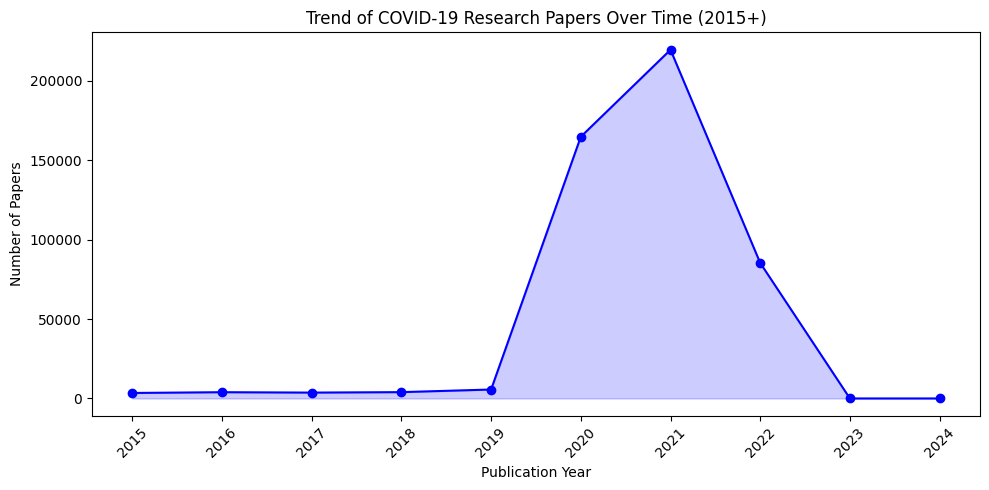

In [49]:
# Visualize publication trends over years


plt.figure(figsize=(10,5))
plt.plot(year_counts.index, year_counts.values, marker="o", color="blue")
plt.fill_between(year_counts.index, year_counts.values, alpha=0.2, color="blue")
plt.xlabel("Publication Year")
plt.ylabel("Number of Papers")
plt.title("Trend of COVID-19 Research Papers Over Time (2015+)")
plt.xticks(year_counts.index, rotation=45)
plt.tight_layout()
plt.show()



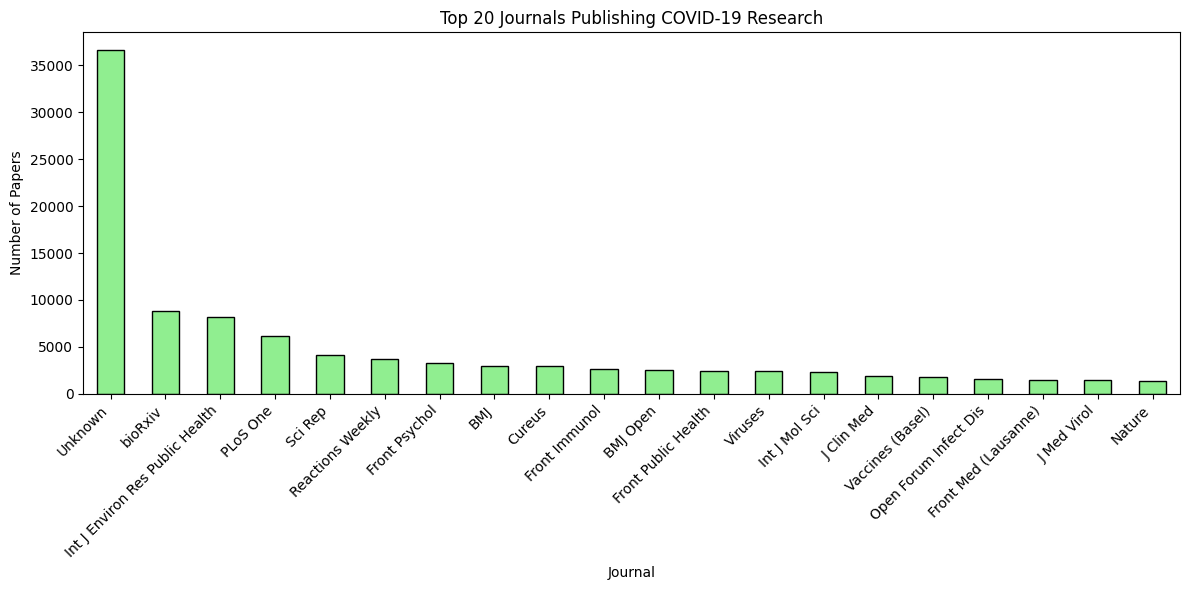

In [47]:
# Visualizing top journals in a bar chart

plt.figure(figsize=(12,6))
top_journals.plot(kind='bar', color="lightgreen", edgecolor="black")
plt.title("Top 20 Journals Publishing COVID-19 Research")
plt.xlabel("Journal")
plt.ylabel("Number of Papers")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


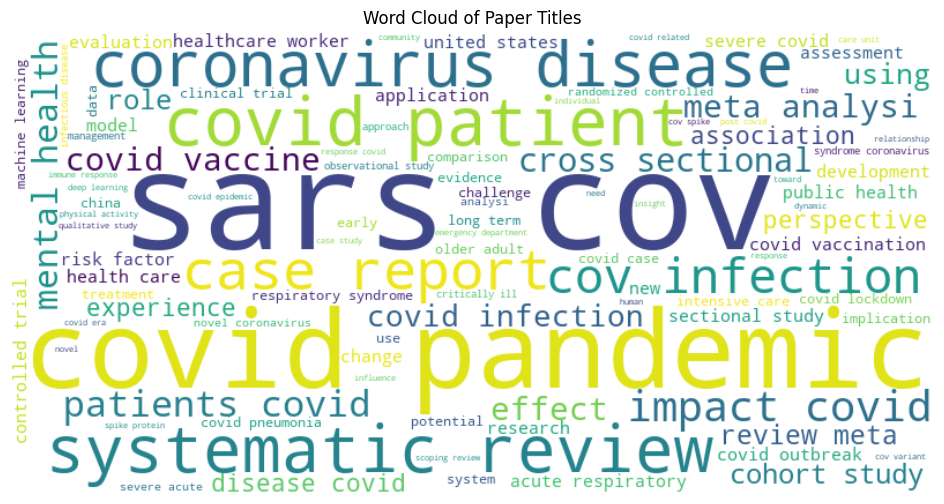

In [ ]:
# Word Cloud of common words in titles
# Joining pre-processed words into one string
all_words_str = " ".join(all_words)

# Generating word cloud from processed words
wc = WordCloud(width=800, height=400, background_color="white",
               colormap="viridis", max_words=100).generate(all_words_str)

# Plotting it
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Paper Titles")
plt.show()

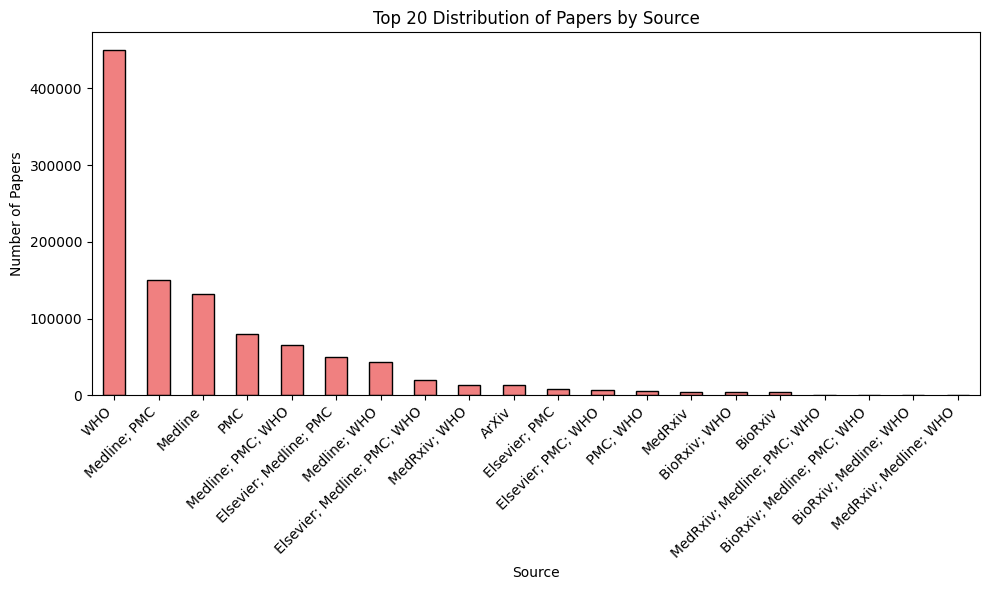

In [58]:
# Distribution of papers by source
plt.figure(figsize=(10,6))
source_counts = df['source_x'].value_counts()
source_counts.head(20).plot(kind='bar', color="lightcoral", edgecolor="black")
plt.title("Top 20 Distribution of Papers by Source")
plt.xlabel("Source")
plt.ylabel("Number of Papers")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()